<pre><font size=6>Spoken Digit Recognition</font></pre>

<pre>
In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>

</pre>

In [2]:
! pip install librosa

In [3]:
import numpy as np
import pandas as pd
import librosa
import os
##if you need any imports you can do that here. 

We shared recordings.zip, please unzip those. 

In [3]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"


In [1]:
!wget --header="Host: doc-00-84-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_00a611a34ggr69lmnvkhoksk11lu0npb_nonce=vpc3r5sl4p1ro" --header="Connection: keep-alive" "https://doc-00-84-docs.googleusercontent.com/docs/securesc/n5tequvs1gm3hik1bov42ncmvls592ur/inbn5mugcu9k9ov8un3fpjc1sn3sje21/1626799425000/00484516897554883881/06982383997589471526/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0&nonce=vpc3r5sl4p1ro&user=06982383997589471526&hash=ojcg3oni13puqdoof9n9nhq3jgakgar0" -c -O 'recordings.zip'

--2021-07-20 16:45:31--  https://doc-00-84-docs.googleusercontent.com/docs/securesc/n5tequvs1gm3hik1bov42ncmvls592ur/inbn5mugcu9k9ov8un3fpjc1sn3sje21/1626799425000/00484516897554883881/06982383997589471526/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&authuser=0&nonce=vpc3r5sl4p1ro&user=06982383997589471526&hash=ojcg3oni13puqdoof9n9nhq3jgakgar0
Resolving doc-00-84-docs.googleusercontent.com (doc-00-84-docs.googleusercontent.com)... 74.125.206.132, 2a00:1450:400c:c04::84
Connecting to doc-00-84-docs.googleusercontent.com (doc-00-84-docs.googleusercontent.com)|74.125.206.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘recordings.zip’

recordings.zip          [  <=>               ]   8.85M  17.9MB/s    in 0.5s    

2021-07-20 16:45:32 (17.9 MB/s) - ‘recordings.zip’ saved [9282934]



In [4]:
import zipfile
with zipfile.ZipFile("/content/recordings.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
import os
len(os.listdir("recordings")) #there are 2000 audi files

2000

In [6]:
all_files=[]
for i in os.listdir("recordings"):  #saving full path name for particular file
    a="/content/recordings" +"/" +str(i)
    all_files.append(a)

<font size=4>Grader function 1 </font>

In [7]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

In [ ]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0


In [8]:
separate =  [int(file_path.split("/")[-1].split("_")[0]) for file_path in all_files]  
len(separate)

2000

In [9]:
df_audio = pd.DataFrame()
df_audio["path"] = all_files
df_audio["label"] = separate
print("Shape of df_audio is :",df_audio.shape)
df_audio.head()

Shape of df_audio is : (2000, 2)


path  label
0     /content/recordings/5_theo_35.wav      5
1  /content/recordings/6_nicolas_40.wav      6
2   /content/recordings/4_jackson_5.wav      4
3   /content/recordings/5_nicolas_7.wav      5
4  /content/recordings/3_nicolas_18.wav      3

In [10]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [11]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [12]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [13]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [14]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%


In [15]:
X_train , X_test , y_train , y_test = train_test_split(df_audio , df_audio.label , random_state = 45,
                                                       test_size = 0.3,stratify = df_audio.label)



In [16]:
X_train.shape

(1400, 2)

In [17]:
y_train.shape

(1400,)

In [18]:
X_test.shape

(600, 2)

In [19]:
y_test.shape

(600,)

<font size=4>Grader function 3 </font>

In [20]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [21]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [22]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train


## Applying load_wav on X_train

In [23]:
new_location = X_train.iloc[0]["path"]
loadwav_ = load_wav(new_location)
sample = loadwav_[0]
duration = loadwav_[1]
X_train_processed = pd.DataFrame({"raw_data":[sample],"duration":duration})

In [24]:
for i in tqdm(range(1,len(X_train))):
  new_location = X_train.iloc[i]["path"]
  loadwav_ = load_wav(new_location)
  sample = loadwav_[0]
  duration = loadwav_[1]
  X_train_processed = X_train_processed.append({'raw_data':sample, "duration":duration},ignore_index=True)


100%|██████████| 1399/1399 [00:25<00:00, 53.98it/s]


In [25]:
X_train_processed.shape

(1400, 2)

In [26]:
X_train_processed.head()

raw_data  duration
0  [0.016102266, 0.02327044, 0.028403997, 0.03119...  0.162041
1  [-0.008993486, -0.010982729, -0.011640892, -0....  0.443537
2  [0.00076898345, 0.0006697864, 0.00023488962, -...  0.499002
3  [6.4700674e-07, 5.2238494e-05, 5.88599e-05, -3...  0.455283
4  [-0.00062388205, -8.516192e-05, 0.00023025037,...  0.341542

## Applying load_wav on X_test

In [27]:
new_location = X_test.iloc[0]["path"]
loadwav_ = load_wav(new_location)
sample = loadwav_[0]
duration = loadwav_[1]
X_test_processed = pd.DataFrame({"raw_data":[sample],"duration":duration})

In [28]:
for i in tqdm(range(1,len(X_test))):
  new_location = X_test.iloc[i]["path"]
  loadwav_ = load_wav(new_location)
  sample = loadwav_[0]
  duration = loadwav_[1]
  X_test_processed = X_test_processed.append({'raw_data':sample, "duration":duration},ignore_index=True)


100%|██████████| 599/599 [00:10<00:00, 55.00it/s]


In [29]:
X_test_processed.shape

(600, 2)

In [30]:
X_train_processed.head()

raw_data  duration
0  [0.016102266, 0.02327044, 0.028403997, 0.03119...  0.162041
1  [-0.008993486, -0.010982729, -0.011640892, -0....  0.443537
2  [0.00076898345, 0.0006697864, 0.00023488962, -...  0.499002
3  [6.4700674e-07, 5.2238494e-05, 5.88599e-05, -3...  0.455283
4  [-0.00062388205, -8.516192e-05, 0.00023025037,...  0.341542

In [31]:
#plot the histogram of the duration for trian


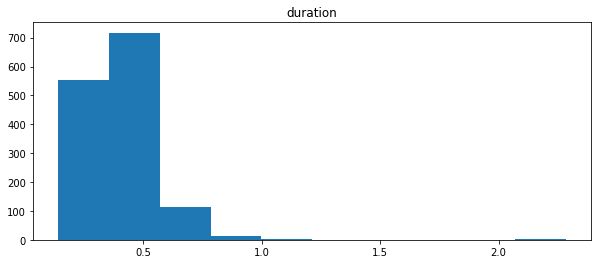

In [32]:
h_tr = X_train_processed.hist("duration",grid=False,figsize = (10,4))

In [33]:
#plot the histogram of the duration for test


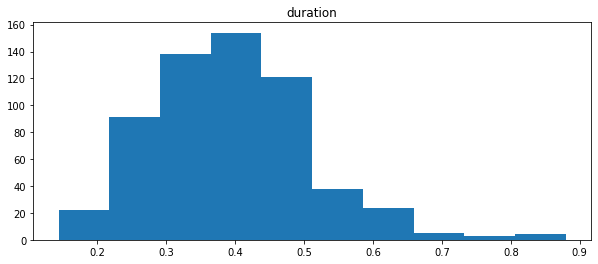

In [34]:
h_te = X_test_processed.hist("duration",grid=False,figsize = (10,4))

In [35]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 


In [36]:
for j in range(0,100+1,10):
    print(j,"th Percentile value of train dataset is :",np.percentile(X_train_processed.duration.values,j))

0 th Percentile value of train dataset is : 0.1436281179138322
10 th Percentile value of train dataset is : 0.26082993197278914
20 th Percentile value of train dataset is : 0.302766439909297
30 th Percentile value of train dataset is : 0.33215419501133786
40 th Percentile value of train dataset is : 0.3585850340136054
50 th Percentile value of train dataset is : 0.39045351473922907
60 th Percentile value of train dataset is : 0.418639455782313
70 th Percentile value of train dataset is : 0.44734240362811784
80 th Percentile value of train dataset is : 0.48618594104308394
90 th Percentile value of train dataset is : 0.5633514739229026
100 th Percentile value of train dataset is : 2.282766439909297


In [37]:
##print 90 to 100 percentile values with step size of 1. 

In [38]:
for k in range(90,100+1,1):
    print(k,"th Percentile value of train dataset is :",np.percentile(X_train_processed.duration.values,k))

90 th Percentile value of train dataset is : 0.5633514739229026
91 th Percentile value of train dataset is : 0.5757945578231292
92 th Percentile value of train dataset is : 0.5915356009070297
93 th Percentile value of train dataset is : 0.60822358276644
94 th Percentile value of train dataset is : 0.6215936507936507
95 th Percentile value of train dataset is : 0.6355306122448978
96 th Percentile value of train dataset is : 0.6502639455782312
97 th Percentile value of train dataset is : 0.6662371882086167
98 th Percentile value of train dataset is : 0.7050403628117913
99 th Percentile value of train dataset is : 0.8072766439909297
100 th Percentile value of train dataset is : 2.282766439909297


<font size=4>Grader function 4 </font>

In [39]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<pre>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset. 

While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640

Pad with Zero if length of sequence is less than 17640 else Truncate the number. 

Also create a masking vector for train and test. 

masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.
</pre>

In [40]:
max_length  = 17640

In [41]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

## padding n truncating on train dataset


## Padding

In [42]:
X_train_pad_seq = []

In [43]:
for l in tqdm(X_train_processed.raw_data.values):   # for l=tokens
  l = list(l)
  if len(l) < max_length:
    rest = max_length - len(l)
    for i in range(rest):
      l.append(0)

  if len(l) > max_length:
    l = l[0:max_length]
  l = np.array(l)
  X_train_pad_seq.append(l)

100%|██████████| 1400/1400 [00:05<00:00, 278.89it/s]


In [44]:
X_train_pad_seq = np.array(X_train_pad_seq)
print(X_train_pad_seq.shape)

(1400, 17640)


#Masking

In [45]:
X_train_mask = []

In [46]:
for l in tqdm(X_train_pad_seq):
  num = len(np.nonzero(l)[0])
  t = [1]*num + [0]*(max_length - num)
  t = np.array(t)
  X_train_mask.append(t)
X_train_mask = np.array(X_train_mask, dtype = "bool")


100%|██████████| 1400/1400 [00:02<00:00, 675.51it/s]


In [47]:
X_train_mask.shape

(1400, 17640)

In [48]:
X_train_mask.dtype

dtype('bool')

## Padding and truncated on test data

# Padding

In [49]:
X_test_pad_seq = []

In [50]:
for l in tqdm(X_test_processed.raw_data.values):   # for l=tokens
  l = list(l)
  if len(l) < max_length:
    rest = max_length - len(l)
    for i in range(rest):
      l.append(0)

  if len(l) > max_length:
    l = l[0:max_length]
  l = np.array(l)
  X_test_pad_seq.append(l)

100%|██████████| 600/600 [00:02<00:00, 278.43it/s]


In [51]:
X_test_pad_seq = np.array(X_test_pad_seq)
print(X_test_pad_seq.shape)

(600, 17640)


## Masking

In [52]:
X_test_mask = []

In [53]:
for l in tqdm(X_test_pad_seq):
  num = len(np.nonzero(l)[0])
  t = [1]*num + [0]*(max_length - num)
  t = np.array(t)
  X_test_mask.append(t)
X_test_mask = np.array(X_test_mask, dtype = "bool")


100%|██████████| 600/600 [00:00<00:00, 676.02it/s]


In [54]:
X_test_mask.shape

(600, 17640)

In [55]:
X_test_mask.dtype

dtype('bool')

<font size=4>Grader function 5 </font>

In [56]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 

<pre>
Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). 
3. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
4. make sure that it won't overfit. 
5. You are free to include any regularization
</pre>

In [57]:
expandDim_X_tr_pad = np.expand_dims(X_train_pad_seq, axis=2)

In [58]:
expandDim_X_te_pad = np.expand_dims(X_test_pad_seq, axis=2)

In [59]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [60]:
# class auc_n_f1(tf.keras.callbacks.Callback):
#   def on_train_begin(self, logs={}):  
#     self.mat_={'f1_score': []}  

#   def end_epoch(self, epoch, logs={}):  ## it is a dict with keys [loss, acc, val_loss, val_acc]
#     final_y_predicted=[]
#     prob_y_pred=self.model.predict(test_data) #prob predicting

#     for i in prob_y_pred:
#       final_y_predicted.append(np.argmax(i)) #whichever is maximum value thats index is class

#     self.mat_["f1_score"].append(f1_score(y_test,final_y_predicted,average='micro'))


#     print("f1 score is ",self.mat_["f1_score"][epoch])


In [61]:
# mat2 = auc_n_f1()

#tensorboard callback

In [62]:
# %load_ext tensorboard

In [63]:
# #!rm -rf ./logs/
# import datetime


In [64]:
# mkdir my_log_dir

In [65]:
# import os
# my_log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(my_log_dir, histogram_freq=1,write_graph=True,write_grads=True)

In [66]:
# my_log_dir


## Callback when accuracy reaches 10%

In [67]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_accuracy') > 0.10):
#       print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.10*100))
#       self.model.stop_training = True

In [68]:
# callback_acc_val=myCallback()

## Modelpoint check point

In [69]:
# filepath="/content/best_model_L1h5"

In [70]:
# #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
# best_model_weight=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')


In [71]:
fst_input = Input(shape = expandDim_X_tr_pad[0].shape,name = "input_layer")
msk_ = Input(shape = 17640,name = "input_mask",dtype="bool")

lstm_ = LSTM(25,name = "lstm_layer")(inputs = fst_input,mask = msk_)

dns_1 = Dense(64,activation="relu",name ="dense_1_layer")(lstm_)

final_output = Dense(10,activation = "softmax",name = "output_layer")(dns_1)

In [72]:
#model_1 = None
model1 = tf.keras.Model(inputs =[fst_input,msk_],outputs = final_output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm_layer (LSTM)               (None, 25)           2700        input_layer[0][0]                
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dense_1_layer (Dense)           (None, 64)           1664        lstm_layer[0][0]             

In [73]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ["accuracy"])

In [74]:
train_data = [expandDim_X_tr_pad,X_train_mask]
test_data = [expandDim_X_te_pad,X_test_mask]

In [75]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [76]:
# f1_score_list = []

# class Metrics_callback(tf.keras.callbacks.Callback):
#     def __init__(self,validation_data,f1_score_thresold):
#         super(Metrics_callback,self).__init__()
#         self.validation_data = validation_data
#         self.f1_score_thresold = f1_score_thresold
#     def on_train_begin(self,logs = {}):

#         self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[],'microf1':[]}
        
#     def on_epoch_end(self,epoch,logs = {}):
#         X_test = self.validation_data[0]
#         Y_test = self.validation_data[1]
#         y_pred = (np.asarray(self.model.predict(X_test)))

#         final_y_pred = []

#         for array in y_pred:
#           predicted_value = np.argmax(array)
#           final_y_pred.append(predicted_value)

#         microf1score = f1_score(Y_test,final_y_pred,average = "micro")
#         print(f'- micro F1 score : {round(microf1score,6)}')
#         self.history['microf1'].append(microf1score)
#         f1_score_list.append(microf1score)

#         if microf1score >= self.f1_score_thresold:
#             print("Model reached ",self.f1_score_thresold*100,"% Micro_f1_score thresold So stoping Training..!!")
#             self.model.stop_training = True
        


In [77]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.10):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.10*100))
      self.model.stop_training = True

In [78]:
callback_acc_val=myCallback()

In [79]:
# mat_1m = Metrics_callback(validation_data = ([expandDim_X_te_pad,X_test_mask], y_test),f1_score_thresold = 0.1)

In [80]:
class auc_n_f1(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):  
    self.mat_={'f1_score': []}  

  def end_epoch(self, epoch, logs={}):  ## it is a dict with keys [loss, acc, val_loss, val_acc]
    final_y_predicted=[]
    prob_y_pred=self.model.predict(test_data) #prob predicting

    for i in prob_y_pred:
      final_y_predicted.append(np.argmax(i)) #whichever is maximum value thats index is class

    self.mat_["f1_score"].append(f1_score(y_test,final_y_predicted,average='micro'))


    print("f1 score is ",self.mat_["f1_score"][epoch])


In [81]:
filepath="/content/best_model_L1h5"

In [82]:
# #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
best_model_weight=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')


In [83]:
mat2 = auc_n_f1()

In [84]:
# for Tensorboard
import os
import datetime
logdir = os.path.join("model_1_tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [85]:
model1.fit([expandDim_X_tr_pad,X_train_mask], y_train,
                         epochs=10,
                         verbose=True,
                         batch_size=16,
                         validation_data = (test_data,y_test),
                         callbacks = [callback_acc_val,mat2,best_model_weight,tensorboard_callback])

Epoch 1/10
88/88 [==============================] - 145s 2s/step - loss: 2.3035 - accuracy: 0.0814 - val_loss: 2.3026 - val_accuracy: 0.1000

Reached 10.00% accuracy, so stopping training!!


### 2. Converting into spectrogram and giving spectrogram data as input  
<pre>
We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram
</pre>

In [86]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [87]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)


##x_train spectrogram

In [88]:
X_train_spectrogram = []

In [89]:
for i in tqdm(X_train_pad_seq):
    spec = convert_to_spectrogram(i)
    X_train_spectrogram.append(spec)
X_train_spectrogram = np.array(X_train_spectrogram)

100%|██████████| 1400/1400 [00:09<00:00, 153.96it/s]


In [90]:
X_train_spectrogram.shape

(1400, 64, 35)

## X_test spectrogram

In [91]:
X_test_spectrogram = []

In [92]:
for i in tqdm(X_test_pad_seq):
    spec = convert_to_spectrogram(i)
    X_test_spectrogram.append(spec)
X_test_spectrogram = np.array(X_test_spectrogram)

100%|██████████| 600/600 [00:03<00:00, 150.15it/s]


In [93]:
X_test_spectrogram.shape

(600, 64, 35)

<font size=4>Grader function 6 </font>

In [94]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True

<pre>
Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (#., time_steps, features) average the output of every time step i.e, you should get (#.,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use micro F1 score as metric) and histograms of gradients. 
5. make sure that it won't overfit. 
6. You are free to include any regularization
</pre>

In [95]:
from tensorflow.keras.layers import Input, LSTM, Dense , GlobalAveragePooling1D

In [96]:
fst_input_2 = Input(shape = X_train_spectrogram[0].shape,name = "input_layer")
#msk_ = Input(shape = 17640,name = "input_mask",dtype="bool")

lstm_ = LSTM(25,name = "lstm_layer",return_sequences = True)(inputs  = fst_input_2)

global_avg = GlobalAveragePooling1D(data_format='channels_first' )(lstm_)

dns_1 = Dense(64,activation="relu",name ="dense_1_layer")(global_avg)

final_output_2 = Dense(10,activation = "softmax",name = "output_layer")(dns_1)

In [97]:
# f1_score_list = []
# from sklearn.metrics import f1_score

# class Metrics_callback(tf.keras.callbacks.Callback):
#     def __init__(self,validation_data,f1_score_thresold):
#         super(Metrics_callback,self).__init__()
#         self.validation_data = validation_data
#         self.f1_score_thresold = f1_score_thresold
#     def on_train_begin(self,logs = {}):
#         self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[],'microf1':[]}
        
#     def on_epoch_end(self,epoch,logs = {}):
#         X_test = self.validation_data[0]
#         Y_test = self.validation_data[1]
#         y_pred = (np.asarray(self.model.predict(X_test)))
#         final_y_pred = []
#         for array in y_pred:
#           predicted_value = np.argmax(array)
#           final_y_pred.append(predicted_value)
#         microf1score = f1_score(Y_test,final_y_pred,average = "micro")
#         print(f'- micro F1 score : {round(microf1score,6)}')
#         self.history['microf1'].append(microf1score)
#         f1_score_list.append(microf1score)
#         if microf1score >= self.f1_score_thresold:
#             print("Model reached ",self.f1_score_thresold*100,"% Micro_f1_score thresold So stoping Training..!!")
#             self.model.stop_training = True
        
# metrics_clbk = Metrics_callback(validation_data = (X_test_spectrogram , y_test),f1_score_thresold = 0.8)

In [98]:
model2 = tf.keras.Model(inputs = fst_input_2,outputs = final_output_2)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 35)]          0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 64, 25)            6100      
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_1_layer (Dense)        (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


In [99]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ["accuracy"])

In [100]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [101]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.80):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.80*100))
      self.model.stop_training = True

In [102]:
callback_acc_val_2=myCallback()

In [103]:
class auc_n_f1(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):  
    self.mat_={'f1_score': []}  

  def end_epoch(self, epoch, logs={}):  ## it is a dict with keys [loss, acc, val_loss, val_acc]
    final_y_predicted=[]
    prob_y_pred=self.model.predict(X_test_spectrogram) #prob predicting

    for i in prob_y_pred:
      final_y_predicted.append(np.argmax(i)) #whichever is maximum value thats index is class
    #f1_score_ = []
    self.mat_["f1_score"].append(f1_score(y_test,final_y_predicted,average='micro'))
    #f1_score_.append(score2)


    print("f1 score is ",self.mat_["f1_score"][epoch])


In [104]:
filepath="/content/best_model_L1h5"

In [105]:
# #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
best_model_weight_2=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')


In [106]:
mat2m = auc_n_f1()

In [107]:
# for Tensorboard
import os
import datetime
logdir_2 = os.path.join("model_2_tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(logdir_2,histogram_freq=1)

In [108]:
model2.fit(X_train_spectrogram, y_train,
                         epochs=100,
                         verbose=True,
                         batch_size=16,
                         validation_data = (X_test_spectrogram,y_test),
                         callbacks = [callback_acc_val_2,mat2m,best_model_weight_2,tensorboard_callback2])

Epoch 1/100
88/88 [==============================] - 5s 27ms/step - loss: 2.2875 - accuracy: 0.1314 - val_loss: 2.2363 - val_accuracy: 0.2500
Epoch 2/100
88/88 [==============================] - 1s 16ms/step - loss: 2.1719 - accuracy: 0.2121 - val_loss: 2.0808 - val_accuracy: 0.2550
Epoch 3/100
88/88 [==============================] - 1s 15ms/step - loss: 1.9736 - accuracy: 0.3271 - val_loss: 1.8297 - val_accuracy: 0.3700
Epoch 4/100
88/88 [==============================] - 1s 15ms/step - loss: 1.7167 - accuracy: 0.4229 - val_loss: 1.5746 - val_accuracy: 0.4617
Epoch 5/100
88/88 [==============================] - 1s 15ms/step - loss: 1.5035 - accuracy: 0.4929 - val_loss: 1.4393 - val_accuracy: 0.5067
Epoch 6/100
88/88 [==============================] - 1s 15ms/step - loss: 1.3397 - accuracy: 0.5329 - val_loss: 1.2885 - val_accuracy: 0.5883
Epoch 7/100
88/88 [==============================] - 1s 16ms/step - loss: 1.2289 - accuracy: 0.5857 - val_loss: 1.1953 - val_accuracy: 0.5800
Epoch 

### 3. data augmentation  
<pre>
Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.
</pre>

In [109]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [110]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(temp_path)

In [111]:
len(aug_temp)

9

## Model 3

As discussed above, for one data point, we will get 9 augmented data points.  

Split data into train and test (80-20 split)

We have 2000 data points(1600 train points, 400 test points) 

Do augmentation only on train data, after augmentation we will get 14400 train points. 

do the above steps i.e training with raw data and spectrogram data with augmentation.

In [112]:
try_pt = [14,532,5,523]
augmented_data = pd.DataFrame({"raw_data":[try_pt],"label":0})
augmented_data

raw_data  label
0  [14, 532, 5, 523]      0

In [113]:
augmented_data = augmented_data.drop(0) #Dropping that row
augmented_data

Empty DataFrame
Columns: [raw_data, label]
Index: []

In [114]:
for i in tqdm(range(len(df_audio))):
    direc = df_audio.iloc[i].path
    lab = df_audio.iloc[i].label
    gen_aug = generate_augmented_data(direc)
    for j in range(len(gen_aug)):
        augmented_data = augmented_data.append({"raw_data":gen_aug[j],
                                                "label":lab},
                                                ignore_index = True)

100%|██████████| 2000/2000 [08:23<00:00,  3.97it/s]


In [115]:
df_audio = shuffle(augmented_data, random_state=33)

In [116]:
augmented_data.shape

(18000, 2)

In [117]:
augmented_data.head()

raw_data  label
0  [-0.005413065, -0.0036267429, -0.0010004339, -...      5
1  [-0.0054765665, -0.003034734, -0.0009567953, -...      5
2  [-0.005126374, -0.0030950943, -0.0006482258, -...      5
3  [-0.0060634054, -0.0044175354, -0.0017847386, ...      5
4  [-0.0062519433, -0.0039309845, -0.0018892891, ...      5

In [118]:
X_train , X_test , y_train , y_test = train_test_split(df_audio , df_audio.label , random_state = 45,
                                                       test_size = 0.3,stratify = df_audio.label)

In [119]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [120]:
X_train.shape

(12600, 2)

In [121]:
y_train.shape

(12600,)

In [122]:
X_test.shape

(5400, 2)

In [123]:
y_test.shape

(5400,)

In [124]:
max_length  = 17640

# Train padd seq

In [125]:
X_train_pad_seq_3 = []

In [126]:
for l in tqdm(X_train.raw_data.values):   # for l=tokens
  l = list(l)
  if len(l) < max_length:
    rest = max_length - len(l)
    for i in range(rest):
      l.append(0)

  if len(l) > max_length:
    l = l[0:max_length]
  l = np.array(l)
  X_train_pad_seq_3.append(l)

100%|██████████| 12600/12600 [00:46<00:00, 273.13it/s]


##Test padd seq

In [127]:
X_test_pad_seq_3 = []

In [128]:
for l in tqdm(X_test.raw_data.values):   # for l=tokens
  l = list(l)
  if len(l) < max_length:
    rest = max_length - len(l)
    for i in range(rest):
      l.append(0)

  if len(l) > max_length:
    l = l[0:max_length]
  l = np.array(l)
  X_test_pad_seq_3.append(l)

100%|██████████| 5400/5400 [00:19<00:00, 270.70it/s]


##Masking train

In [129]:
X_train_mask_3 = []

In [130]:
for l in tqdm(X_train_pad_seq_3):
  num = len(np.nonzero(l)[0])
  t = [1]*num + [0]*(max_length - num)
  t = np.array(t)
  X_train_mask_3.append(t)
X_train_mask_3 = np.array(X_train_mask_3, dtype = "bool")


100%|██████████| 12600/12600 [00:19<00:00, 658.33it/s]


In [131]:
X_train_mask_3.shape

(12600, 17640)

#Masking test

In [132]:
X_test_mask_3 = []

In [133]:
for l in tqdm(X_test_pad_seq_3):
  num = len(np.nonzero(l)[0])
  t = [1]*num + [0]*(max_length - num)
  t = np.array(t)
  X_test_mask_3.append(t)
X_test_mask_3 = np.array(X_test_mask_3, dtype = "bool")


100%|██████████| 5400/5400 [00:07<00:00, 685.98it/s]


In [134]:
X_test_mask_3.shape

(5400, 17640)

In [135]:
expandDim_X_tr_pad_3 = np.expand_dims(X_train_pad_seq_3, axis=2)

In [136]:
expandDim_X_tr_pad_3 = np.expand_dims(X_train_pad_seq_3, axis=2)

In [137]:
expandDim_X_tr_pad_3[0].shape

(17640, 1)

In [138]:
expandDim_X_te_pad_3 = np.expand_dims(X_test_pad_seq_3, axis=2)

In [139]:
expandDim_X_tr_pad_3[0].shape

(17640, 1)

In [140]:
fst_input_3 = Input(shape = expandDim_X_tr_pad_3[0].shape,name = "input_layer")
msk_3 = Input(shape = 17640,name = "input_mask",dtype="bool")

lstm_3 = LSTM(25,name = "lstm_layer")(inputs = fst_input_3,mask = msk_3)

dns_3 = Dense(64,activation="relu",name ="dense_1_layer")(lstm_3)

final_output_3 = Dense(10,activation = "softmax",name = "output_layer")(dns_3)

In [141]:
model_3 = None
model_3 = tf.keras.Model(inputs =[fst_input_3,msk_3],outputs = final_output_3)
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 17640, 1)]   0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 17640)]      0                                            
__________________________________________________________________________________________________
lstm_layer (LSTM)               (None, 25)           2700        input_layer[0][0]                
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dense_1_layer (Dense)           (None, 64)           1664        lstm_layer[0][0]           

In [142]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics = ["accuracy"])

In [143]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.10):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.10*100))
      self.model.stop_training = True

In [144]:
callback_acc_val_3=myCallback()

In [145]:
class auc_n_f1(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):  
    self.mat_={'f1_score': []}  

  def end_epoch(self, epoch, logs={}):  ## it is a dict with keys [loss, acc, val_loss, val_acc]
    final_y_predicted=[]
    prob_y_pred=self.model.predict(expandDim_X_te_pad_3) #prob predicting

    for i in prob_y_pred:
      final_y_predicted.append(np.argmax(i)) #whichever is maximum value thats index is class
    #f1_score_ = []
    self.mat_["f1_score"].append(f1_score(y_test,final_y_predicted,average='micro'))
    #f1_score_.append(score2)


    print("f1 score is ",self.mat_["f1_score"][epoch])


In [146]:
mat_3 = auc_n_f1()

In [147]:
filepath="/content/best_model_L1h5"

In [148]:
# #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
best_model_weight_3=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')


In [149]:
# for Tensorboard
import os
import datetime
logdir_3 = os.path.join("model_2_tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback3 = tf.keras.callbacks.TensorBoard(logdir_3,histogram_freq=1)

In [150]:
model_3.fit([expandDim_X_tr_pad_3,X_train_mask_3], y_train,
                         epochs=10,
                         verbose=True,
                         batch_size=8,
                         validation_data = ([expandDim_X_te_pad_3,X_test_mask_3],y_test),
                         callbacks = [callback_acc_val_3,mat_3,best_model_weight_3,tensorboard_callback3])

Epoch 1/10
1575/1575 [==============================] - 2031s 1s/step - loss: 2.3033 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000

Reached 10.00% accuracy, so stopping training!!


## Model 4

# code to convert to specturum

In [151]:
def conv_to_spect(raw_data):
    spect = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    con_sep = librosa.power_to_db(S=spect, ref=np.max)
    return con_sep

In [152]:
X_tr_cov_spec = []

In [153]:
for raw_data in tqdm(X_train_pad_seq_3):
    spect = conv_to_spect(raw_data)
    X_tr_cov_spec.append(spect)
X_tr_cov_spec = np.array(X_tr_cov_spec)

100%|██████████| 12600/12600 [01:15<00:00, 167.35it/s]


In [154]:
X_tr_cov_spec.shape

(12600, 64, 35)

# test convert to spectrogram

In [155]:
X_te_cov_spec = []

In [156]:
for raw_data in tqdm(X_test_pad_seq_3):
    spect = conv_to_spect(raw_data)
    X_te_cov_spec.append(spect)
X_te_cov_spec = np.array(X_te_cov_spec)

100%|██████████| 5400/5400 [00:32<00:00, 167.37it/s]


In [157]:
X_te_cov_spec.shape

(5400, 64, 35)

In [158]:
fst_input_4 = Input(shape = X_tr_cov_spec[0].shape,name = "input_layer")
#msk_ = Input(shape = 17640,name = "input_mask",dtype="bool")

lstm_4 = LSTM(25,name = "lstm_layer",return_sequences = True)(inputs  = fst_input_4)

global_avg = GlobalAveragePooling1D(data_format='channels_first' )(lstm_4)

dns_4 = Dense(64,activation="relu",name ="dense_1_layer")(global_avg)

final_output_4 = Dense(10,activation = "softmax",name = "output_layer")(dns_4)

In [159]:
model_4 = tf.keras.Model(inputs =fst_input_4,outputs = final_output_4)
model_4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 35)]          0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 64, 25)            6100      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1_layer (Dense)        (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


In [160]:
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics = ["accuracy"])

In [161]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.80):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.80*100))
      self.model.stop_training = True

In [162]:
callback_acc_val_4=myCallback()

In [163]:
class auc_n_f1(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):  
    self.mat_={'f1_score': []}  

  def end_epoch(self, epoch, logs={}):  ## it is a dict with keys [loss, acc, val_loss, val_acc]
    final_y_predicted=[]
    prob_y_pred=self.model.predict(X_te_cov_spec) #prob predicting

    for i in prob_y_pred:
      final_y_predicted.append(np.argmax(i)) #whichever is maximum value thats index is class
    #f1_score_ = []
    self.mat_["f1_score"].append(f1_score(y_test,final_y_predicted,average='micro'))
    #f1_score_.append(score2)


    print("f1 score is ",self.mat_["f1_score"][epoch])


In [164]:
mat_4 = auc_n_f1()

In [165]:
filepath="/content/best_model_L1h5"

In [166]:
# #https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
best_model_weight_4=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,save_weights_only=True, mode='auto', save_freq='epoch')


In [167]:
# for Tensorboard
import os
import datetime
logdir_4 = os.path.join("model_4_tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback4 = tf.keras.callbacks.TensorBoard(logdir_4,histogram_freq=1)

In [168]:
y_test.shape

(5400,)

In [169]:
model_4.fit(X_tr_cov_spec, y_train,
                         epochs=100,
                         verbose=True,
                         batch_size=12,
                         validation_data = (X_te_cov_spec,y_test),
                         callbacks = [callback_acc_val_4,mat_4,best_model_weight_4,tensorboard_callback4])

Epoch 1/100
1050/1050 [==============================] - 19s 17ms/step - loss: 1.2833 - accuracy: 0.5544 - val_loss: 0.8583 - val_accuracy: 0.6946
Epoch 2/100
1050/1050 [==============================] - 17s 16ms/step - loss: 0.8024 - accuracy: 0.7188 - val_loss: 0.7029 - val_accuracy: 0.7428
Epoch 3/100
1050/1050 [==============================] - 16s 15ms/step - loss: 0.6717 - accuracy: 0.7647 - val_loss: 0.6203 - val_accuracy: 0.7824
Epoch 4/100
1050/1050 [==============================] - 16s 15ms/step - loss: 0.5739 - accuracy: 0.7983 - val_loss: 0.5384 - val_accuracy: 0.8159

Reached 80.00% accuracy, so stopping training!!
